In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('analysis_results.csv')

# Filter out invalid graph sizes (0 and negative values)
df = df[df['GraphSize'] > 0]

# Display first few rows of the data
display(df.head())

,GraphSize,MeanTime,StdDev,ConfInterval,IsNarrowInterval,OptimalSize,MeanHeuristicSize,ApproximationRatio,OptimalMatchRate
0,10,4.5324,2.109690,0.041350,1,8,8,1.000,1
1,15,2.0422,1.450460,0.028429,1,6,6,1.000,1
2,20,1.1918,0.891231,0.017468,1,4,4,1.000,1
3,25,4.0133,1.988500,0.038975,1,8,7,0.875,0
4,30,2.0404,0.628019,0.012309,1,5,5,1.000,1


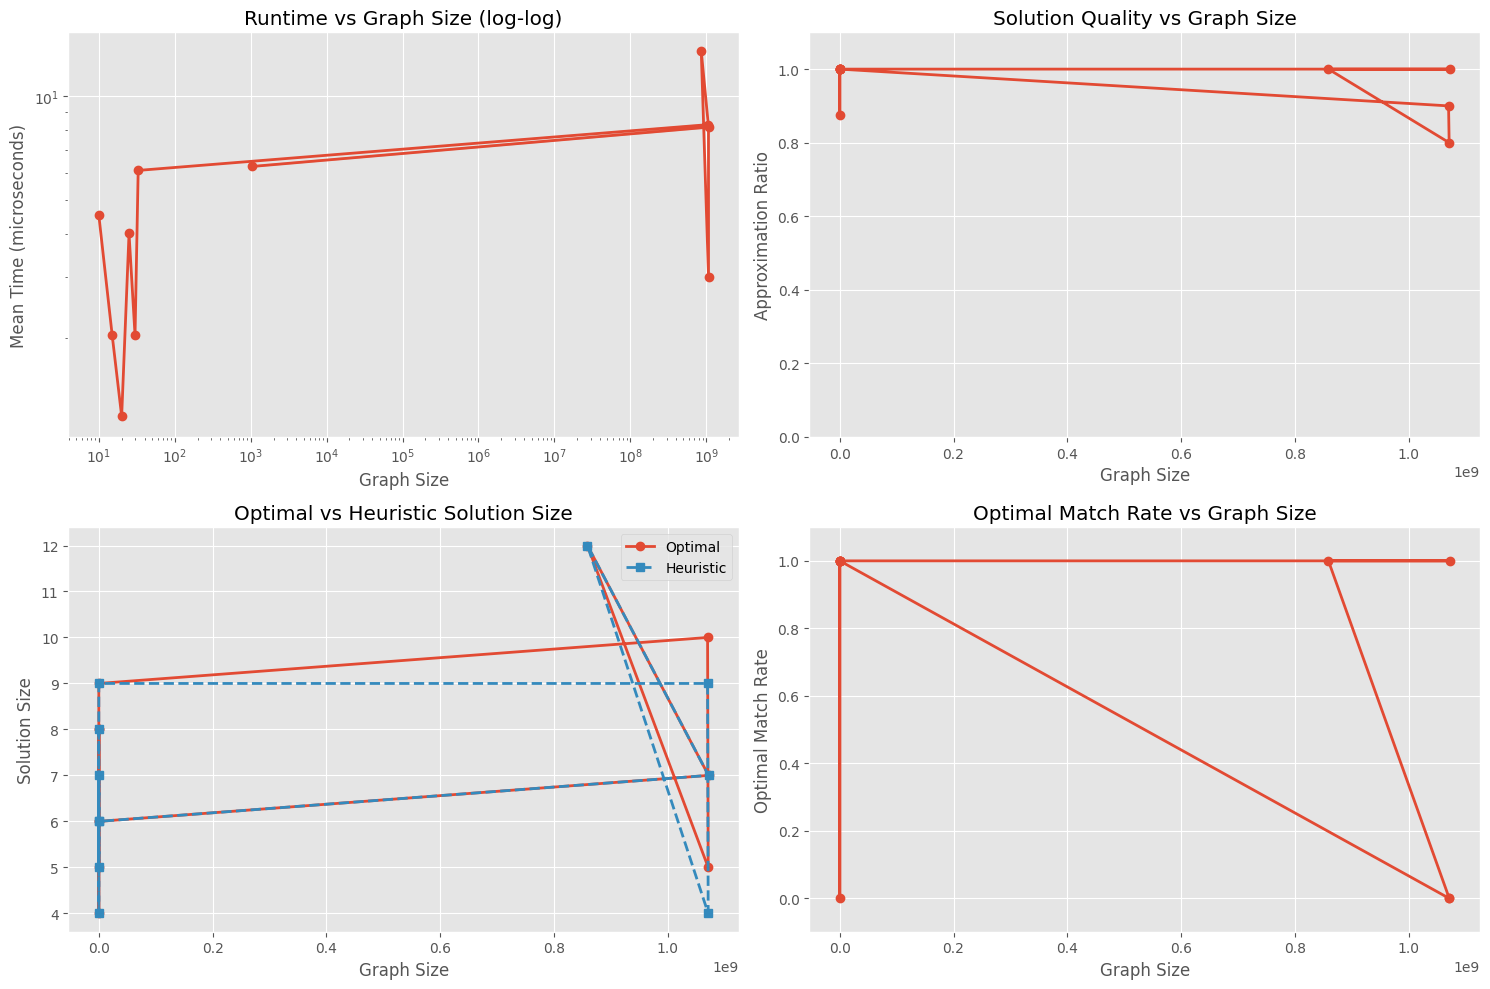

In [3]:
# Cell 3: Create plots
# Create a figure with multiple subplots
fig = plt.figure(figsize=(15, 10))

# Plot 1: Runtime vs Graph Size (log-log)
plt.subplot(2, 2, 1)
plt.loglog(df['GraphSize'], df['MeanTime'], 'o-', linewidth=2)
plt.fill_between(df['GraphSize'], 
                df['MeanTime'] - df['ConfInterval'],
                df['MeanTime'] + df['ConfInterval'],
                alpha=0.3)
plt.grid(True)
plt.xlabel('Graph Size')
plt.ylabel('Mean Time (microseconds)')
plt.title('Runtime vs Graph Size (log-log)')

# Plot 2: Approximation Ratio vs Graph Size
plt.subplot(2, 2, 2)
plt.plot(df['GraphSize'], df['ApproximationRatio'], 'o-', linewidth=2)
plt.grid(True)
plt.xlabel('Graph Size')
plt.ylabel('Approximation Ratio')
plt.title('Solution Quality vs Graph Size')
plt.ylim(0, 1.1)  # Ratio should be between 0 and 1

# Plot 3: Optimal vs Heuristic Solution Size
plt.subplot(2, 2, 3)
plt.plot(df['GraphSize'], df['OptimalSize'], 'o-', label='Optimal', linewidth=2)
plt.plot(df['GraphSize'], df['MeanHeuristicSize'], 's--', label='Heuristic', linewidth=2)
plt.grid(True)
plt.xlabel('Graph Size')
plt.ylabel('Solution Size')
plt.title('Optimal vs Heuristic Solution Size')
plt.legend()

# Plot 4: Optimal Match Rate vs Graph Size
plt.subplot(2, 2, 4)
plt.plot(df['GraphSize'], df['OptimalMatchRate'], 'o-', linewidth=2)
plt.grid(True)
plt.xlabel('Graph Size')
plt.ylabel('Optimal Match Rate')
plt.title('Optimal Match Rate vs Graph Size')
plt.ylim(-0.1, 1.1)  # Rate should be between 0 and 1

plt.tight_layout()
plt.show()

In [4]:
# Cell 4: Print summary statistics
print("Summary Statistics:")
print(f"Average Approximation Ratio: {df['ApproximationRatio'].mean():.3f}")
print(f"Average Optimal Match Rate: {df['OptimalMatchRate'].mean():.3f}")
print(f"Maximum Runtime: {df['MeanTime'].max():.2f} microseconds")

Summary Statistics:
Average Approximation Ratio: 0.961
Average Optimal Match Rate: 0.727
Maximum Runtime: 13.49 microseconds
